In [8]:
import torch
import matplotlib.pyplot as plt

In [2]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [3]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
        
net = RegressionNet(n_hidden_neurons=10)  # Передайте количество скрытых нейронов при создании объекта

In [4]:
# Dataset preparation start
x_train = torch.linspace(-10, 5, 100).unsqueeze_(1)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise

x_validation = torch.linspace(-10, 5, 100).unsqueeze_(1)
y_validation = target_function(x_validation)


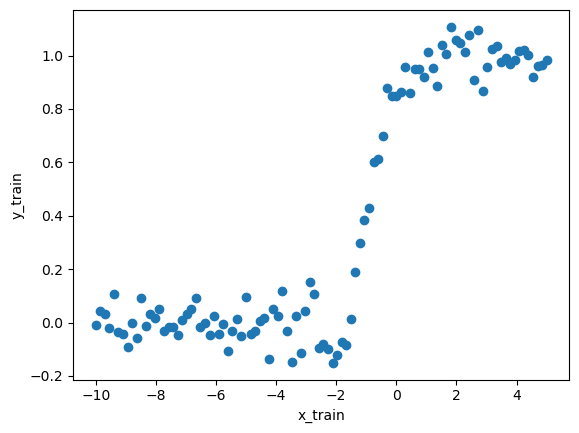

In [9]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [5]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    mae = torch.abs(target - pred)
    return mae.mean() 

In [6]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

In [7]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.023855820298194885
